# <img align="right" src="../additional_data/banner.png" style="width:1100px;">

# Function Demostration: Normalized Difference NIR/Blue-based Cloud Detection for Burkina Faso

* [**Sign up to the JupyterHub**](https://www.phenocube.org/) to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with both the Open Data Cube implemention environments
* **Products used:** 
[s2_l2a](https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/product-types/level-2a)

## Description

This notebook describes the principle of the developed cloud detection algorithms and demonstrates its performance.

Running of this notebook requires two python scripts.

**1) water_ts.py**

**2) cloud_mask.py**

## Set up

In [1]:
# import functions from external scripts
from water_tsa import *
from cloud_mask import *

%matplotlib inline

# import libraries
import datacube
import xarray as xr
import pandas as pd
import geopandas as gpd
import rasterio
from datetime import datetime
import warnings; warnings.simplefilter('ignore')
import imp
from time import time
import matplotlib.pyplot as plt
import numpy as np
from odc.ui import with_ui_cbk
import seaborn as sns
from dask.distributed import Client, LocalCluster
import sys

# libraries for interactive display
import hvplot.xarray
import holoviews as hv

# libraries for accuracy assessment
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
dc = datacube.Datacube(app = '1_MNDWI', config = '/home/datacube/.datacube.conf')
client = Client(n_workers=2, threads_per_worker=3, memory_limit= '0.3GB')

In [4]:
# load example data for cloud detection

shift = 0.15
data = dc.load(product= "s2_l2a_burkinafaso",
               x= (-0.888320+shift, -0.806992+shift),
               y= (13.887174+shift, 13.958550+shift),
               time= ("2018-07-30", "2019-01-01"),
               group_by = "solar_day",
               progress_cbk=with_ui_cbk())

In [5]:
# load example data for cloud detection

shift = 0.298
data1 = dc.load(product= "s2_l2a_burkinafaso",
               x= (-0.888320+shift, -0.806992+shift),
               y= (13.887174+shift, 13.958550+shift),
               time= ("2018-07-30", "2019-03-01"),
               group_by = "solar_day",
               progress_cbk=with_ui_cbk())

In [3]:
# water confusion example

example1 = dc.load(product= "s2_l2a_burkinafaso",
               x= (-0.838320, -0.806992),
               y= (12.887174, 12.908550),
               time= ("2018-08-29", "2018-08-31"),
               group_by = "solar_day",
               progress_cbk=with_ui_cbk())

In [7]:
# relative brightness confusion example
shift = 0.03
# load example data for cloud detection
example2 = dc.load(product= "s2_l2a_burkinafaso",
               x= (-0.888320+shift, -0.806992+shift),
               y= (13.887174+shift, 13.958550+shift),
               time= ("2018-09-08", "2018-09-10"),
               group_by = "solar_day",
               progress_cbk=with_ui_cbk())

In [6]:
example3 = dc.load(product= "s2_l2a_burkinafaso",
               x= (-0.838320, -0.806992),
               y= (12.887174, 12.908550),
               time= ("2019-03-17", "2019-03-19"),
               group_by = "solar_day",
               progress_cbk=with_ui_cbk())

In [10]:
data_assessment = dc.load(product= "s2_l2a_burkinafaso",
               x= (-0.838320, -0.806992),
               y= (12.887174, 12.908550),
               time= ("2018-07-30", "2018-08-01"),
               group_by = "solar_day",
               progress_cbk=with_ui_cbk())

Checking out cloudy scene to test using sceneDisplay().

**Remarks: Sometimes sceneDisplay() is unable to show output until the kernel is restarted.**

Row
    [0] HoloViews(DynamicMap, widgets={'time': <class '...})
    [1] Column
        [0] WidgetBox
            [0] DiscreteSlider(margin=(20, 20, 20, 20), name='time', options=OrderedDict([('2018-07-31 ...]), value=numpy.datetime64('2018-07-..., width=250)
        [1] VSpacer()
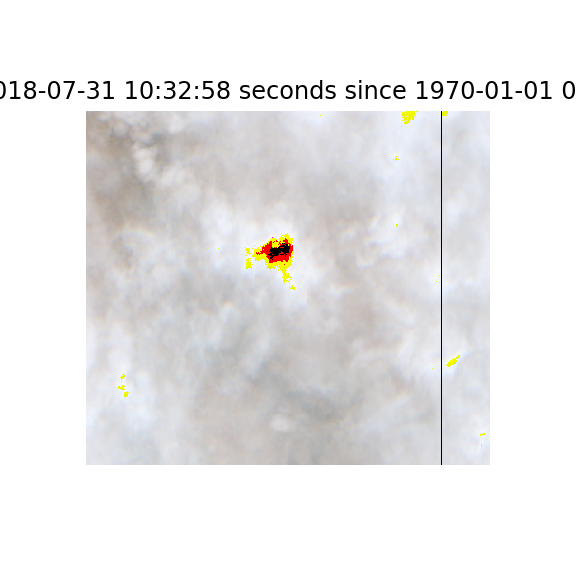

In [10]:
sceneDisplay(data)

Have a quick look of example scene.

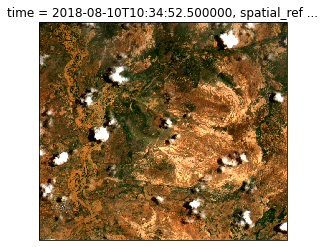

In [11]:
test_scene = data.sel(time = "2018-08-10")
viz2d(test_scene)

***
## Background

This notebook aim to demostrate the developed cloud detection algorithm parimarily based on Normalized Difference NIR/Blue, in the script it is called NDCI, standing for Normalized Difference Cloud Index, as other general name is not found. The script is tested under climate conditions of Burkina Faso  to allow satisfied precision and accuracy in the region. It is, nonetheless, not designed and tested for use in other climate zone, particiularly with snow cover. This algorithm achieved higher overall accuracy than the scl value and more robust against misclassification of both water bodies and vegetation, which is of significant importance for further water detection.

The figure below shows the spectral reflectance of cloud cover compared to other land cover:

<img align="left" src="spectral.png" style="width:500px;">

Conventionally, Normalized-Difference Snow Index (NDSI) (eg. in Sen2Cor) or essentially SWIR band (eg. FMask) as well as other parameters (eg. Thermal band) are used for detection of cloud cover. In this algorithm, NDCI is used instead of NDSI owing to its overall higher performance in cloud distinction.

From the figure, it can be seen that the relative height of blue band (0.49) to NIR band (0.842) is higher for clouds compared to vegetation and soil. The intensity of clouds in NDCI can thus aid effective detection.

#### NDSI = (GREEN - SWIR1)/(GREEN + SWIR1)
#### NDCI = (BLUE - NIR)/(BLUE + NIR)

Their difference in performance can be seen from the following visualization.

In [12]:
test_scene = test_scene.assign(
        NDCI = (test_scene["blue"]/10000 - test_scene["nir"]/10000)/(test_scene["blue"]/10000 + test_scene["nir"]/10000),
        NDSI = (test_scene["green"]/10000 - test_scene["swir1"]/10000)/(test_scene["green"]/10000 + test_scene["swir1"]/10000)
    )

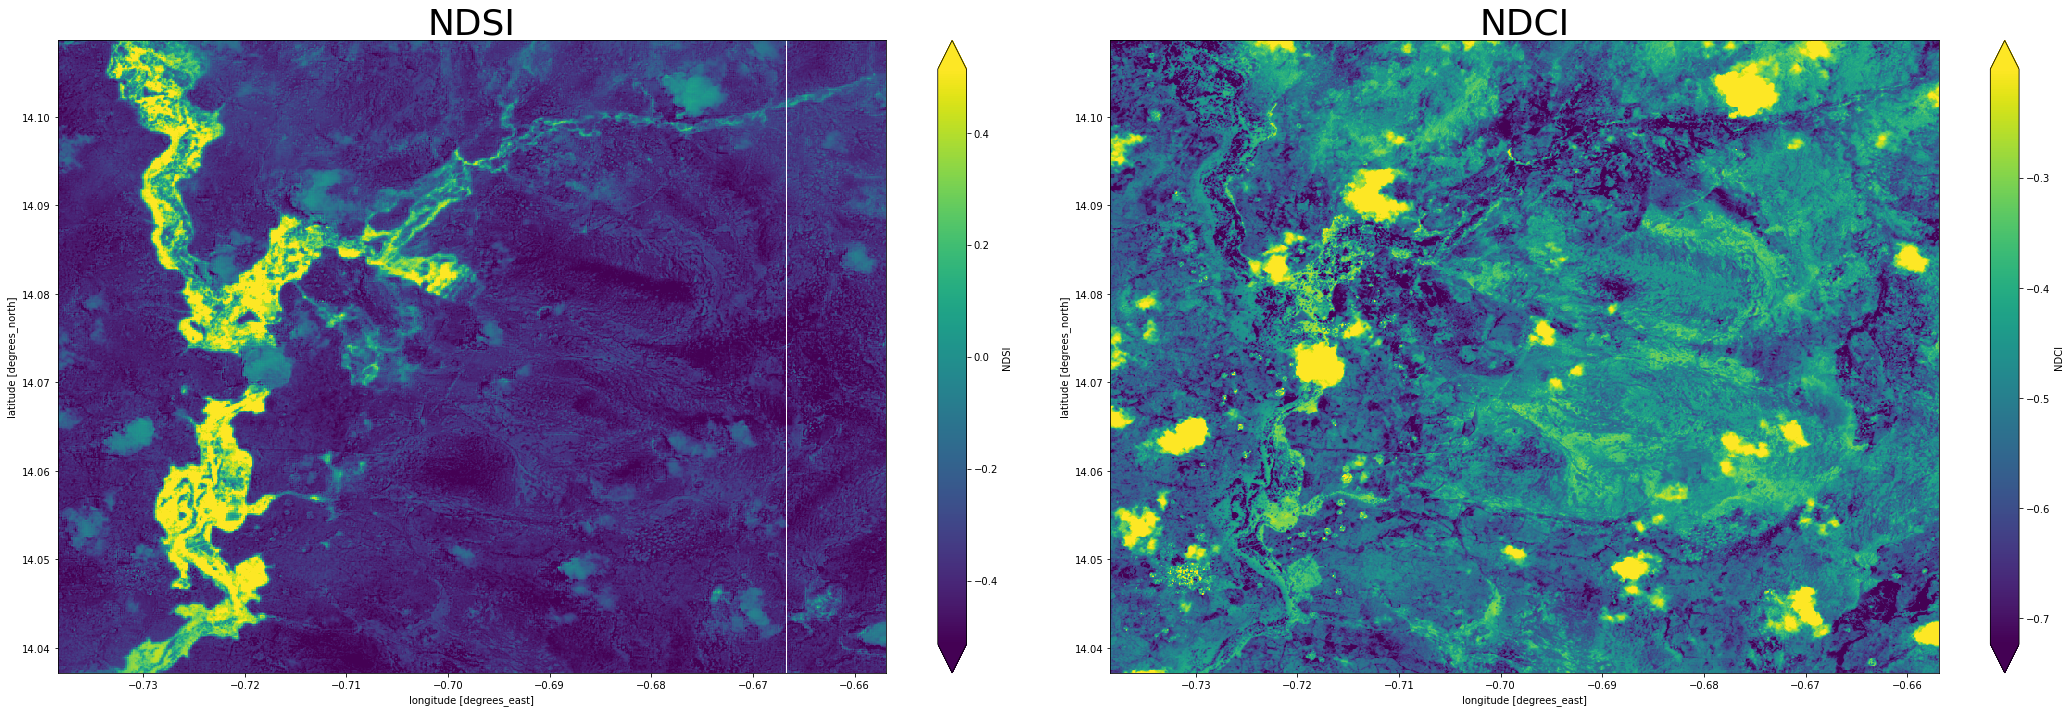

In [13]:
fig, ax = plt.subplots(ncols=2,figsize=(30,10))

# NDSI
test_scene.NDSI.plot(cmap="viridis", ax=ax[0], robust = True)

# NDCI
test_scene.NDCI.plot(cmap="viridis", ax=ax[1], robust = True)

ax[0].set_title('NDSI', fontsize=36)
ax[1].set_title('NDCI', fontsize=36)

plt.tight_layout()
plt.show()

## Limitations of scl
#### 1) Confusion with vegetation
#### 2) Confusion with water
#### 3) High uncertainty (Low and High probability cloud)
#### 4) Lower precision (Limited performance in detecting small cloud objects)

In NDSI, both vegetation and water gives higher spectral reflectance and causes confusion during cloud detection. This can be seen from the scl classification. In this example, vegetation is treated as low probability cloud. Another advantages of the existing cloud mask is that it does not distinguish different cloud probability as the confusion rate is generally lower. In scl, low probability includes both cloud objects and non-cloud objects which make it difficult to to filter clouds for multi-temporal imagery.

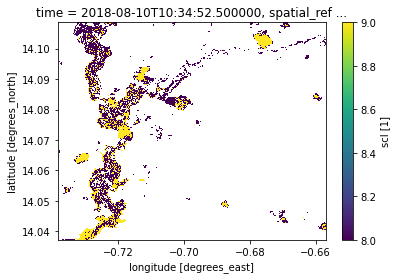

In [14]:
test_scene.where(np.logical_or(test_scene.scl == 8,test_scene.scl == 9)).scl.plot()

Below is another example that in scl, water is confused with cloud cover.

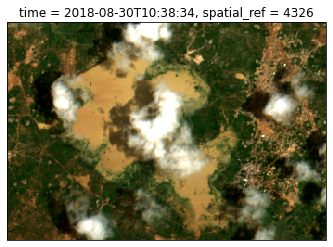

In [15]:
# RGB imagery of the example scene
viz2d(example1)

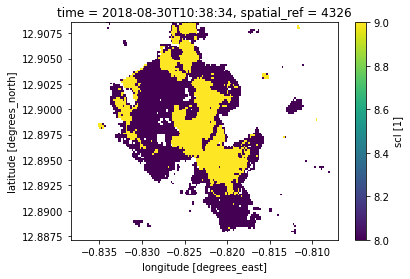

In [16]:
example1.where(np.logical_or(example1.scl == 8,example1.scl == 9)).scl.plot()

In fact, this confusion can be due to NDSI, as water bodies produce high NDSI values.

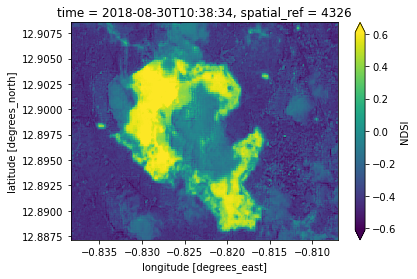

In [17]:
example1 = example1.assign(
        NDSI = (example1["green"]/10000 - example1["swir1"]/10000)/(example1["green"]/10000 + example1["swir1"]/10000)
    )

example1.NDSI.plot(cmap="viridis", robust = True)

Although the confusion also exist in NDCI, the contrast is much lower, and the remaining confusion can be solved using a threshold of water vapour as water areas have much lower value. 

Besides, scl also overestimate cloud in relatively cloudy condition, such as in the following example.

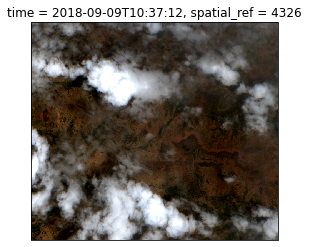

In [18]:
viz2d(example2)

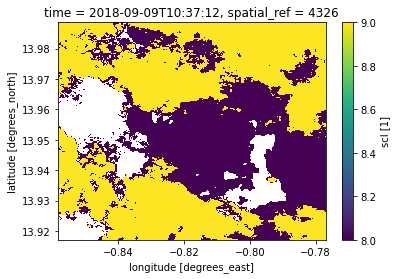

In [19]:
example2.where(np.logical_or(example2.scl == 8,example2.scl == 9)).scl.plot()

## NDCI-based Cloud Mask: 
### Two-fold method with histogram-based dynamic thresholds

In the NDCI-based cloud mask, the detection is in two fold: first, the general weather condition will be defined before the formation of the threshold. The weather condition will be divided into "Clear Sky", "Partly Clouds", "Mostly Clouds", and "All Clouds".

# <img align="left" src="weather.png" style="width:900px;">

**Figure: Classification of cloud conditions.**

Next, threshold will be defined according to statistics and the characteristics of the NDCI histogram. 

#### Statistics considered including:
* #### median
* #### standard deviation
* #### skewness
* #### kurtosis
* #### number of prominent peak
* #### argmax of the histogram.

# <img align="left" src="stat.png" style="width:500px;">

**Figure: Illustration of skewness and kurtosis.**

#### The general observed patterns include:
#### 1) Negative skewness for cloudy situation
#### 2) Peak < -0.3 for clear sky
#### 3) NDCI of clouds often appear as the peak > -0.4 to -0.3
#### 4) Water (high NDCI) confusion can be compensated by excluding low water vapour pixels

The figure below displays the example histgram of NDCI, both represents cloudy condition, with negative skewness and peak larger than -0.4.

# <img align="left" src="cloudy.png" style="width:600px;">

**Figures: Example histograms of cloudy scene**

## General Performance

To show the general performance of the NDCI mask, we can look at a few examples.

Extract a few scene from data:

In [20]:
a = 0
fewscene = data.isel(time = [a,a+2,a+4,a+6,a+8,a+10])

Row
    [0] HoloViews(DynamicMap, widgets={'time': <class '...})
    [1] Column
        [0] WidgetBox
            [0] DiscreteSlider(margin=(20, 20, 20, 20), name='time', options=OrderedDict([('2018-07-31 ...]), value=numpy.datetime64('2018-07-..., width=250)
        [1] VSpacer()
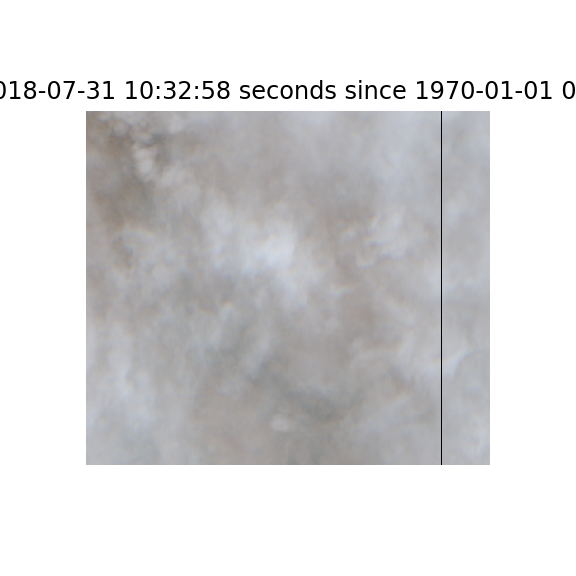

In [21]:
sceneDisplay(fewscene)

In [22]:
masked = s2cmask(fewscene)

### Cloud Detection based on scl value:
where scl = 8 and 9 indicates low and high probability of clouds respectively.

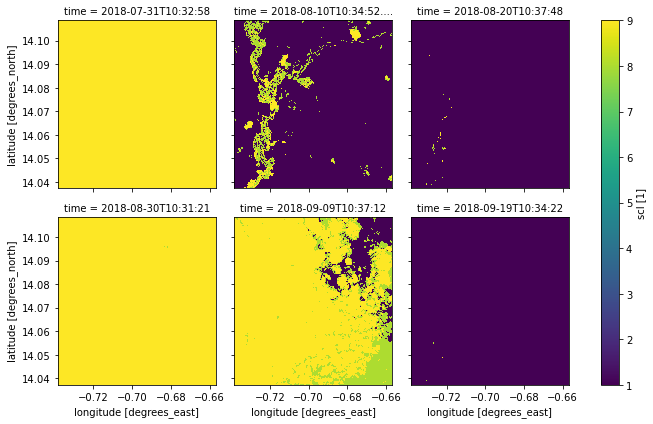

In [23]:
masked.where(np.logical_or(masked.scl == 8,masked.scl == 9),1.0,0.0).scl.plot(col="time",col_wrap=3)

### NDCI-based Cloud Detection:

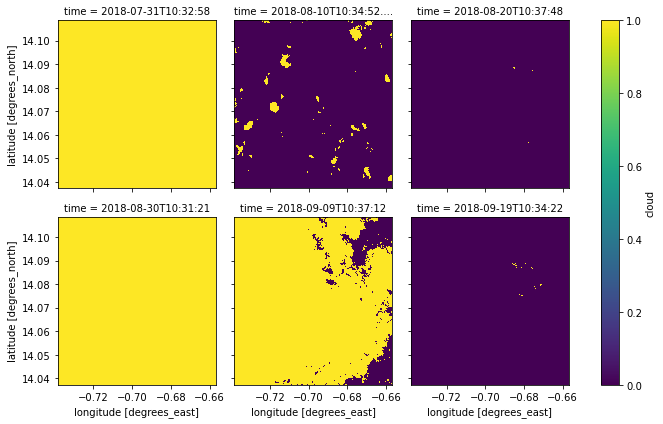

In [24]:
masked.cloud.plot(col="time",col_wrap=3)

Row
    [0] HoloViews(DynamicMap, widgets={'time': <class '...})
    [1] Column
        [0] WidgetBox
            [0] DiscreteSlider(margin=(20, 20, 20, 20), name='time', options=OrderedDict([('2018-07-31 ...]), value=numpy.datetime64('2018-07-..., width=250)
        [1] VSpacer()
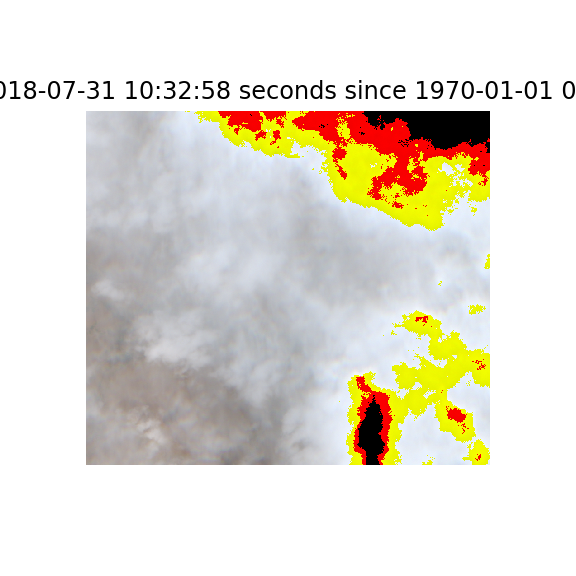

In [25]:
sceneDisplay(data1)

Row
    [0] HoloViews(DynamicMap, widgets={'time': <class '...})
    [1] Column
        [0] WidgetBox
            [0] DiscreteSlider(margin=(20, 20, 20, 20), name='time', options=OrderedDict([('2018-07-31 ...]), value=numpy.datetime64('2018-07-..., width=250)
        [1] VSpacer()
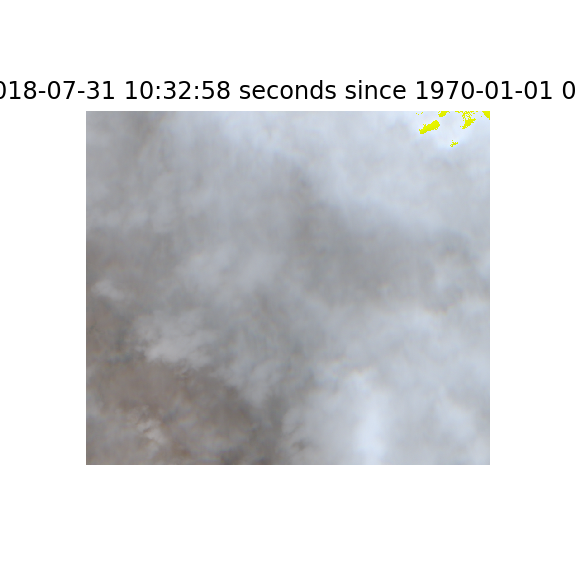

In [39]:
a = 0
fewscene = data1.isel(time = [a,a+2,a+4,a+6])

sceneDisplay(fewscene)

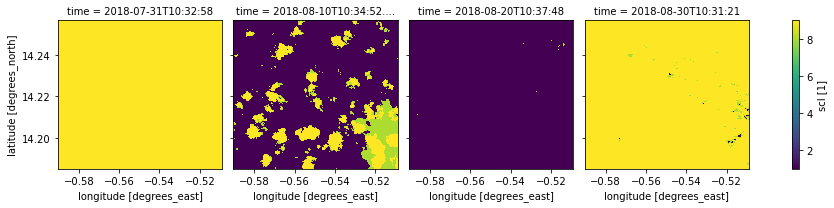

In [36]:
masked = s2cmask(fewscene)

masked.where(np.logical_or(masked.scl == 8,masked.scl == 9),1.0,0.0).scl.plot(col="time",col_wrap=4)

**Figure: Cloud Classification of scl values**

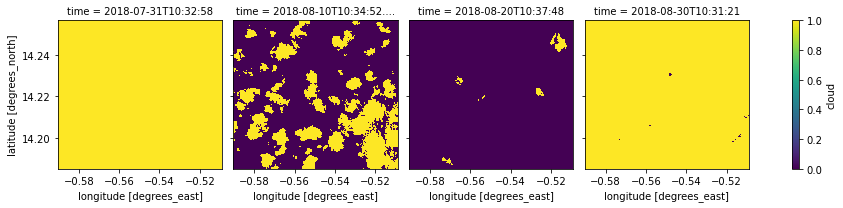

In [38]:
masked.cloud.plot(col="time",col_wrap=4)

**Figure: Cloud Classification of NDCI-based cloud mask**

For example, in the 3rd scene, there are a few clouds despite the clear sky, which scl fails to detect. In the NDCI-based cloud mask, however, they would be detected. Also, less cloud can be detected by scl in the 2nd scene.

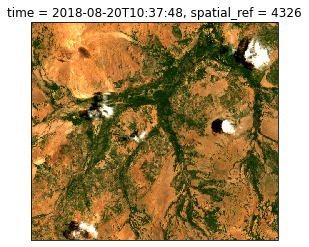

In [40]:
viz2d(fewscene.isel(time = [2]))

Going back to the first example, water are clearly distinguished from cloud.

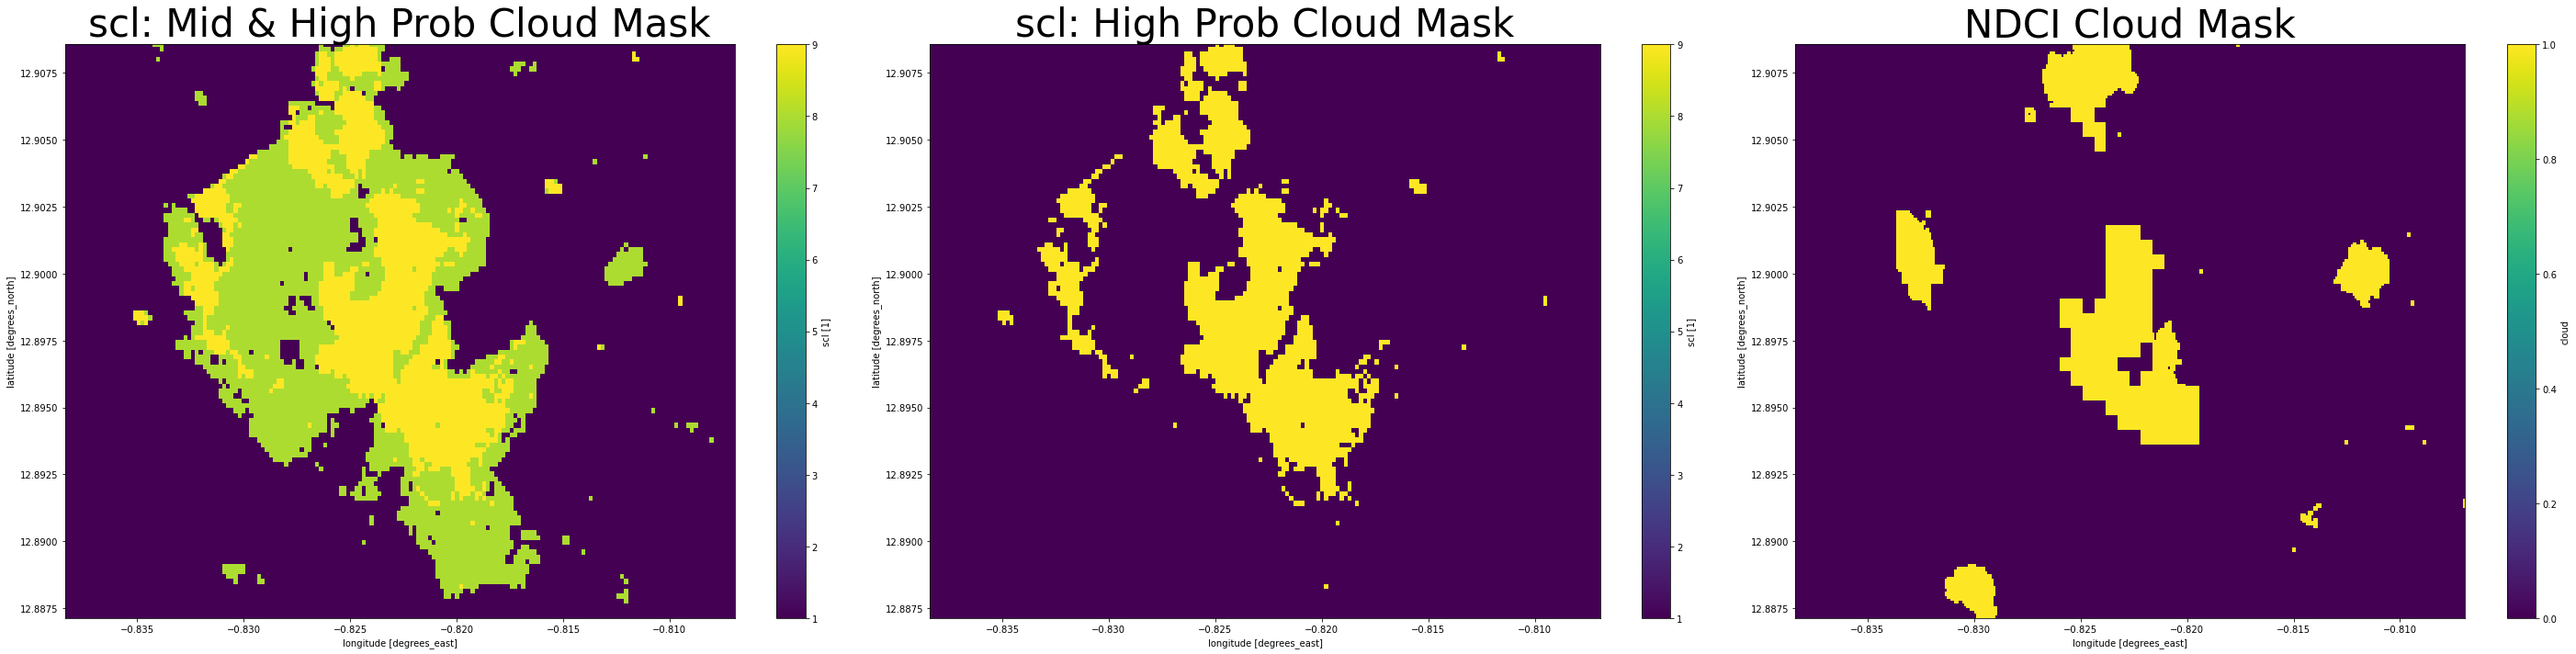

In [4]:
fig, ax = plt.subplots(ncols=3,figsize=(40,10))

# scl: middle and high probability
ssmask(example1).where(np.logical_or(example1.scl == 8,example1.scl == 9),1.0,0.0).scl.plot(ax=ax[0])

# scl: high probability only
ssmask(example1).where(example1.scl == 9,1.0,0.0).scl.plot(ax=ax[1])

# NDCI cloud mask
ssmask(example1).cloud.plot(ax=ax[2])

ax[0].set_title('scl: Mid & High Prob Cloud Mask', fontsize=42)
ax[1].set_title('scl: High Prob Cloud Mask', fontsize=42)
ax[2].set_title('NDCI Cloud Mask', fontsize=42)

plt.tight_layout()
plt.show()

## Another Test Scene

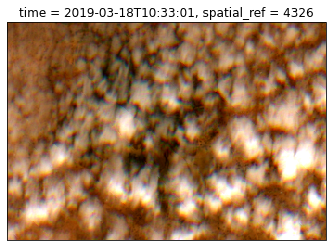

In [7]:
viz2d(example3)

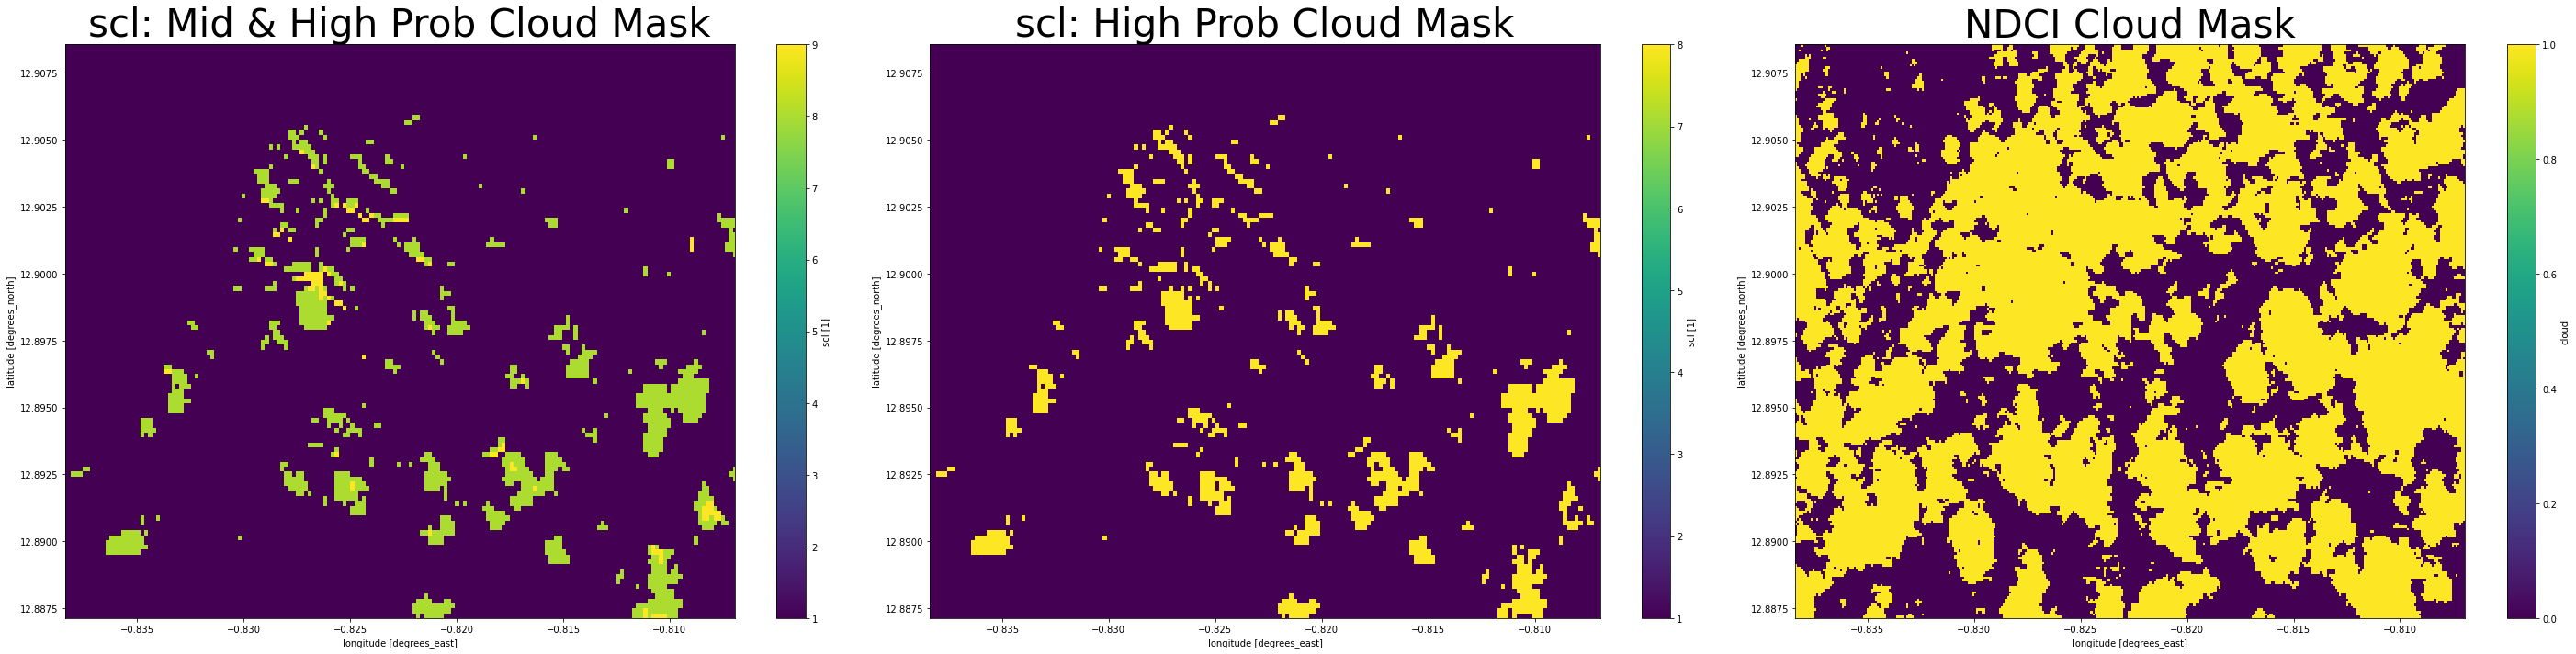

In [8]:
fig, ax = plt.subplots(ncols=3,figsize=(40,10))

# scl: middle and high probability only
example3.where(np.logical_or(example3.scl == 8,example3.scl == 9),1.0,0.0).scl.plot(ax=ax[0])

# scl: high probability
example3.where(example3.scl == 8,1.0,0.0).scl.plot(ax=ax[1])

# NDCI cloud mask
ssmask(example3).cloud.plot(ax=ax[2])

ax[0].set_title('scl: Mid & High Prob Cloud Mask', fontsize=42)
ax[1].set_title('scl: High Prob Cloud Mask', fontsize=42)
ax[2].set_title('NDCI Cloud Mask', fontsize=42)

plt.tight_layout()
plt.show()

## Accuracy Assessment

In [11]:
cm_arr = ssmask(data_assessment).cloud.values
ndciMask = cm_arr.astype('int').squeeze()

In [12]:
sf = gpd.read_file('cloudTraining_100.shp')

In [13]:
ShapeMask = rasterio.features.geometry_mask(sf.geometry,
                                      out_shape=(len(data_assessment.latitude), len(data_assessment.longitude)),
                                      transform=data_assessment.geobox.transform,
                                      invert=True)
ShapeMask = xr.DataArray(ShapeMask , dims=("latitude","longitude"))

truth = ShapeMask.values.astype(int)

data_assessment = data_assessment.assign(cloud_scl = xr.where(data_assessment.scl==9, 1.0, 0.0))
scl_mask = data_assessment.cloud_scl.values.squeeze()

data_assessment = data_assessment.assign(cloud_scl_all = xr.where(np.logical_or(data_assessment.scl==8,data_assessment.scl==9), 1.0, 0.0))

scl_mask = data_assessment.cloud_scl.values.squeeze()
scl_mask_all = data_assessment.cloud_scl_all.values.squeeze()

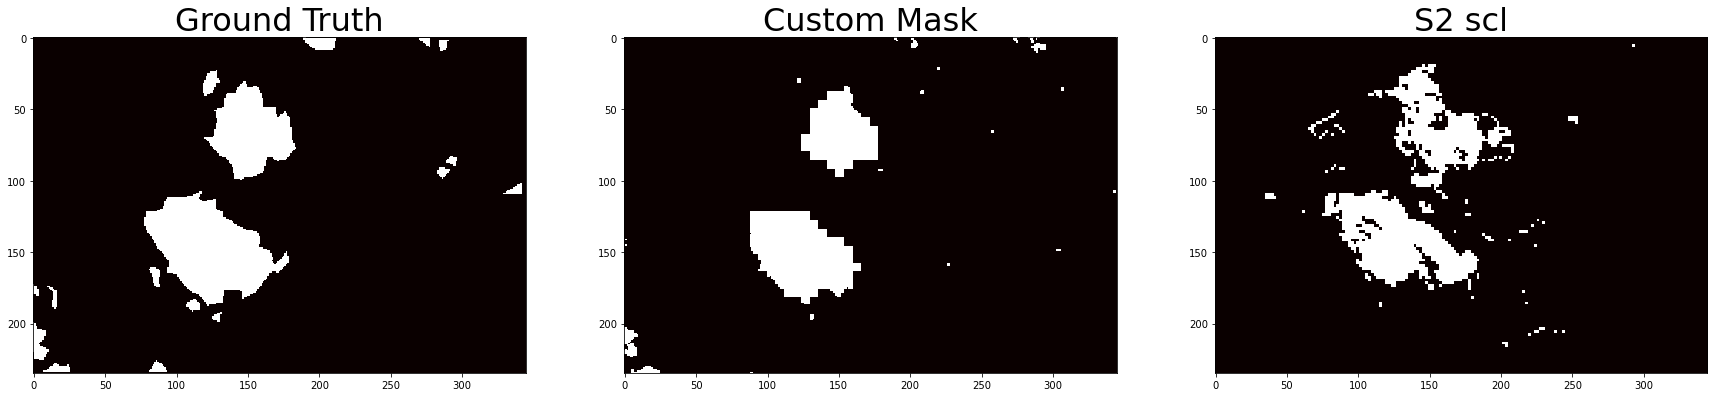

In [14]:
# Have a look at the ground truth for the cloud mask

fig2 = plt.subplots(ncols=3,figsize=(30,10))

ax1 = plt.subplot(131)
plt.imshow(truth, cmap='hot', interpolation='nearest')

ax2 = plt.subplot(132)
plt.imshow(ndciMask, cmap='hot', interpolation='nearest')

ax3 = plt.subplot(133)
plt.imshow(scl_mask, cmap='hot', interpolation='nearest')

ax1.set_title('Ground Truth', fontsize = 32)
ax2.set_title('Custom Mask', fontsize = 32)
ax3.set_title('S2 scl', fontsize = 32)

plt.tight_layout
plt.show()

In [37]:
# scl mask
acc_scl = round(accuracy_score(truth.flatten(), scl_mask.flatten())*100,2)

# ndci mask
acc_ndci = round(accuracy_score(truth.flatten(), ndciMask.flatten())*100,2)

# confusion matrix
cm_custom = confusion_matrix(truth.flatten(), ndciMask.flatten())
cm_scl = confusion_matrix(truth.flatten(), scl_mask.flatten())

In [45]:
cm_custom_par = [cm_custom[0][0]/(cm_custom[0][0] + cm_custom[0][1]),cm_custom[1][1]/(cm_custom[1][0] + cm_custom[1][1])]
cm_scl_par = [cm_scl[0][0]/(cm_scl[0][0] + cm_custom[0][1]),cm_scl[1][0]/(cm_scl[1][1] + cm_scl[1][1])]

In [58]:
f1_custom = f1_score(truth.flatten(), ndciMask.flatten())
f1_scl = f1_score(truth.flatten(), scl_mask.flatten())

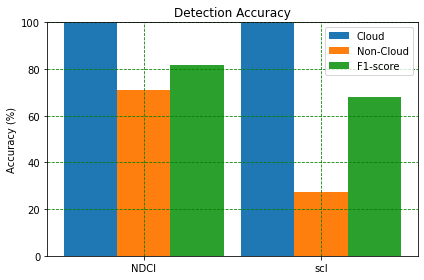

In [72]:
labels = ['NDCI', 'scl']
cloud_acc = [round(cm_custom_par[0]*100,2),round(cm_scl_par[0]*100,2)]
noncloud_acc = [round(cm_custom_par[1]*100,2),round(cm_scl_par[1]*100,2)]
f1 = [f1_custom*100, f1_scl*100]

x = np.arange(len(labels))  # the label locations
width = 0.3 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, cloud_acc, width, label='Cloud')
rects2 = ax.bar(x, noncloud_acc, width, label='Non-Cloud')
rects3 = ax.bar(x + width, f1, width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.set_title('Detection Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0,100)

fig.tight_layout()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.8)
plt.show()

## References

Tarrio, K., Tang, X., Masek, J. G., Claverie, M., Ju, J., Qiu, S., ... & Woodcock, C. E. (2020). Comparison of cloud detection algorithms for Sentinel-2 imagery. Science of Remote Sensing, 2, 100010.